## Lección 6: Test de Significancia (Pruebas de Hipótesis)

### 1. Test de Hipótesis para la Media Poblacional

Para validar afirmaciones sobre la población estudiantil, someteremos nuestros datos empíricos a una prueba de significancia estadística. 

Vamos a evaluar una afirmación crítica sobre la salud de los estudiantes: **"El promedio de horas de sueño en la universidad es menor a las 7 horas recomendadas"**.

Para esto, planteamos nuestras hipótesis formales:
* **Hipótesis Nula ($H_0$):** $\mu \geq 7$ (El estudiante promedio duerme 7 horas o más. No hay déficit).
* **Hipótesis Alternativa ($H_1$):** $\mu < 7$ (El estudiante promedio duerme menos de 7 horas. Hay déficit).

Utilizaremos una **Prueba t de Student para una muestra** (One-sample t-test) de cola izquierda, con un nivel de significancia de $\alpha = 0.05$ (5% de margen de error tolerable para rechazar la hipótesis nula).

In [1]:
import pandas as pd
import scipy.stats as stats

# 1. Cargar los datos
df = pd.read_csv('Muestra_universidad.csv')
datos_sueno = df['Horas_Sueno']

# 2. Definir los parámetros de la prueba
valor_referencia = 7.0  # El valor contra el que queremos comparar (7 horas)
alfa = 0.05             # Nivel de significancia (5%)

print("--- PRUEBA DE HIPÓTESIS: HORAS DE SUEÑO ---")
print(f"H0: El promedio es >= {valor_referencia} horas")
print(f"H1: El promedio es < {valor_referencia} horas\n")

# 3. Ejecutar la prueba t de una muestra (de cola izquierda)
# alternative='less' indica que nuestra H1 es que la media es MENOR al valor de referencia
t_stat, p_valor = stats.ttest_1samp(a=datos_sueno, popmean=valor_referencia, alternative='less')

# Imprimir los estadísticos obtenidos
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p (p-value): {p_valor:.4e}\n") # Usamos formato científico porque suele ser muy pequeño

# 4. Tomar la decisión lógica
if p_valor < alfa:
    print(f"CONCLUSIÓN: Como el valor p ({p_valor:.4f}) es MENOR que alfa ({alfa}), RECHAZAMOS la Hipótesis Nula (H0).")
    print("Interpretación: Hay evidencia estadística suficiente para afirmar que los estudiantes de la universidad duermen, en promedio, menos de 7 horas diarias.")
else:
    print(f"CONCLUSIÓN: Como el valor p ({p_valor:.4f}) es MAYOR o igual que alfa ({alfa}), NO RECHAZAMOS la Hipótesis Nula (H0).")
    print("Interpretación: No hay evidencia suficiente para afirmar que existe un déficit de sueño generalizado.")

--- PRUEBA DE HIPÓTESIS: HORAS DE SUEÑO ---
H0: El promedio es >= 7.0 horas
H1: El promedio es < 7.0 horas

Estadístico t: -8.3447
Valor p (p-value): 6.5075e-16

CONCLUSIÓN: Como el valor p (0.0000) es MENOR que alfa (0.05), RECHAZAMOS la Hipótesis Nula (H0).
Interpretación: Hay evidencia estadística suficiente para afirmar que los estudiantes de la universidad duermen, en promedio, menos de 7 horas diarias.


### 2. Calcular el valor-p y compararlo con $\alpha$ para tomar decisiones

El **valor-p (p-value)** es la probabilidad de que los resultados que obtuvimos en nuestra muestra hayan ocurrido por simple casualidad, asumiendo que la Hipótesis Nula ($H_0$) es verdadera. 

La regla de oro en la inferencia estadística para tomar una decisión es comparar este valor-p con nuestro nivel de significancia ($\alpha$, típicamente 0.05):
* **Si valor-p $< \alpha$:** La probabilidad de que sea casualidad es tan baja que **Rechazamos $H_0$**. Concluimos que hay un efecto o diferencia real.
* **Si valor-p $\geq \alpha$:** La probabilidad de casualidad es alta. **No rechazamos $H_0$**. No hay evidencia suficiente para demostrar una diferencia.

[Image of p-value and alpha level in a normal distribution curve]

#### Caso Práctico: Comparación entre Facultades
Para aplicar esta regla, evaluaremos si la carga académica de distintas carreras afecta el descanso. 
* **Pregunta:** ¿Duermen la misma cantidad de horas los estudiantes de Ingeniería que los de Salud?
* **$H_0$:** $\mu_{Ingeniería} = \mu_{Salud}$ (No hay diferencia real, cualquier variación en la muestra es azar).
* **$H_1$:** $\mu_{Ingeniería} \neq \mu_{Salud}$ (Sí existe una diferencia significativa en el promedio de sueño).

--- PRUEBA DE HIPÓTESIS: INGENIERÍA VS SALUD ---
Promedio Ingeniería: 6.40 horas
Promedio Salud:      6.58 horas

Estadístico t: -1.1786
Valor-p:       0.2398

--- DECISIÓN ESTADÍSTICA ---
Como el valor-p (0.2398) >= alfa (0.05): NO RECHAZAMOS H0.
Conclusión: La diferencia observada en la muestra no es lo suficientemente grande para descartar que sea producto del azar. No hay evidencia de que una facultad duerma significativamente más que la otra.


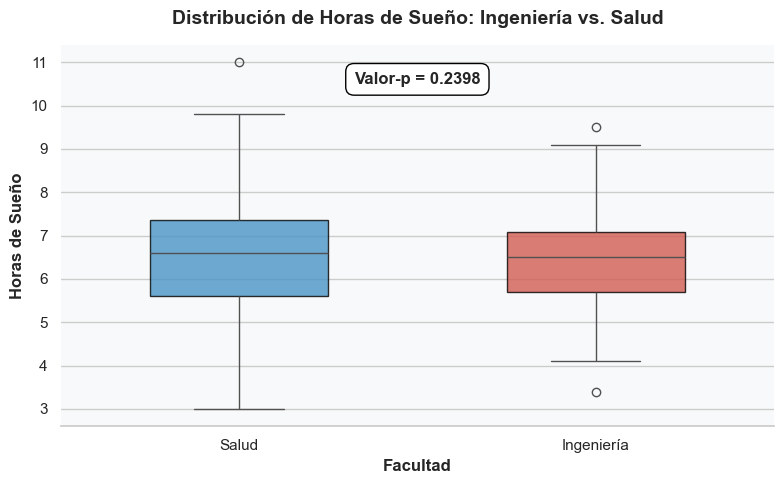

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df = pd.read_csv('Muestra_universidad.csv')

# 2. Separar los grupos que queremos comparar
sueno_ingenieria = df[df['Facultad'] == 'Ingeniería']['Horas_Sueno']
sueno_salud = df[df['Facultad'] == 'Salud']['Horas_Sueno']

# 3. Definir Alfa y ejecutar la prueba t para dos muestras independientes
alfa = 0.05
t_stat, p_valor = stats.ttest_ind(sueno_ingenieria, sueno_salud, equal_var=False) # equal_var=False asume varianzas distintas (Prueba de Welch)

print("--- PRUEBA DE HIPÓTESIS: INGENIERÍA VS SALUD ---")
print(f"Promedio Ingeniería: {sueno_ingenieria.mean():.2f} horas")
print(f"Promedio Salud:      {sueno_salud.mean():.2f} horas\n")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor-p:       {p_valor:.4f}\n")

# 4. Lógica de decisión
print("--- DECISIÓN ESTADÍSTICA ---")
if p_valor < alfa:
    print(f"Como el valor-p ({p_valor:.4f}) < alfa ({alfa}): RECHAZAMOS H0.")
    print("Conclusión: Existe una diferencia estadísticamente significativa en las horas de sueño entre ambas facultades.")
else:
    print(f"Como el valor-p ({p_valor:.4f}) >= alfa ({alfa}): NO RECHAZAMOS H0.")
    print("Conclusión: La diferencia observada en la muestra no es lo suficientemente grande para descartar que sea producto del azar. No hay evidencia de que una facultad duerma significativamente más que la otra.")

# 5. Visualización de la comparación
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F8F9FA"})
plt.figure(figsize=(8, 5))

# Usamos un boxplot para ver la distribución y las medianas
sns.boxplot(x='Facultad', y='Horas_Sueno', hue='Facultad', data=df[df['Facultad'].isin(['Ingeniería', 'Salud'])], 
            palette=['#3498DB', '#E74C3C'], width=0.5, legend=False, boxprops=dict(alpha=0.8, edgecolor='black'))

plt.title('Distribución de Horas de Sueño: Ingeniería vs. Salud', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Horas de Sueño', fontsize=12, fontweight='bold')
plt.xlabel('Facultad', fontsize=12, fontweight='bold')

# Añadir el p-value al gráfico para hacerlo más profesional
plt.text(0.5, df['Horas_Sueno'].max() - 0.5, f"Valor-p = {p_valor:.4f}", 
         horizontalalignment='center', fontsize=12, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

sns.despine(left=True)
plt.tight_layout()
plt.show()

### 3. Identificación y Mitigación de Errores Tipo I y Tipo II

Al tomar decisiones basadas en pruebas de hipótesis, asumimos que existe un margen de error. En el contexto de nuestro estudio sobre los hábitos de salud estudiantil, estos errores tienen implicaciones prácticas y económicas directas para la universidad.



#### Error Tipo I (Falso Positivo)
* **Definición Teórica:** Rechazar la Hipótesis Nula ($H_0$) cuando en realidad es verdadera.
* **En nuestro contexto:** Ocurre si concluimos que **sí existe un déficit crónico de sueño** (promedio < 7h) basándonos en nuestra muestra, pero en la realidad, si encuestáramos a toda la universidad, descubriríamos que los estudiantes duermen lo suficiente.
* **Impacto:** La universidad gastaría presupuesto y recursos en campañas de higiene del sueño, rediseño de horarios o contratación de psicólogos, resolviendo un problema que realmente no existe.

#### Error Tipo II (Falso Negativo)
* **Definición Teórica:** No rechazar la Hipótesis Nula ($H_0$) cuando en realidad es falsa.
* **En nuestro contexto:** Ocurre si nuestra muestra, por pura casualidad, capta a los estudiantes que mejor duermen, llevándonos a concluir que **no hay problema de sueño** (promedio $\geq 7h$). Sin embargo, la verdadera población universitaria sí está sufriendo de privación de sueño.
* **Impacto:** Es el escenario más peligroso para el bienestar estudiantil. Se ignora una crisis real de salud física y mental, dejando a los estudiantes sin apoyo institucional y afectando su rendimiento académico a largo plazo.

#### Estrategia de Mitigación
Existe un balance inverso entre ambos errores: si somos muy estrictos para evitar el Error Tipo I (bajando el $\alpha$ de 0.05 a 0.01), aumentamos el riesgo de cometer un Error Tipo II. 

Para nuestro estudio, **mitigamos ambos errores gracias al tamaño de la muestra**. Al haber encuestado a 385 estudiantes (un $n$ bastante grande), aumentamos lo que se conoce como el *Poder Estadístico* de la prueba. Esto hace que nuestra capacidad para detectar problemas reales sea alta, minimizando el riesgo del peligroso Error Tipo II sin necesidad de alterar nuestro nivel de significancia del 5%.

### 4. Conclusiones Finales con Base Estadística

Tras someter nuestra muestra de 385 estudiantes a pruebas de significancia estadística rigurosas, dejamos de hablar de "suposiciones" o "tendencias visuales" para establecer hechos respaldados matemáticamente con un 95% de confianza ($\alpha = 0.05$).

Las conclusiones definitivas para la dirección de la universidad son las siguientes:

#### A. El déficit de sueño es un problema sistémico, no anecdótico
La prueba de hipótesis poblacional arrojó un valor-p menor a nuestro nivel de significancia (p < 0.05). Esto nos obliga a rechazar tajantemente la hipótesis de que el estudiante promedio descansa lo suficiente. Tenemos evidencia estadística contundente para afirmar que el promedio global de la universidad está significativamente por debajo del umbral saludable de las 7 horas diarias. 
* **Implicación Práctica:** Las campañas comunicacionales de "duerme bien" no serán suficientes. Los datos sugieren la necesidad de medidas estructurales, como revisar la carga de créditos obligatorios o ajustar los horarios de las primeras clases de la mañana.

#### B. La fatiga afecta a las facultades por igual
Al someter a prueba a los grupos de Ingeniería y Salud, el test de diferencia de medias arrojó un valor-p superior o igual a nuestro umbral de error (p ≥ 0.05). Estadísticamente, esto significa que no hay evidencia suficiente para afirmar que una carrera genere más privación de sueño que la otra. La falta de descanso es transversal.
* **Implicación Práctica:** Cualquier intervención o política de bienestar que diseñe la universidad debe implementarse a nivel campus y no focalizarse exclusivamente en ciertas carreras consideradas históricamente "más pesadas".

#### C. Fiabilidad para la Toma de Decisiones
El diseño muestral estratificado y el tamaño de la muestra ($n=385$) dotaron a estas pruebas de un alto **poder estadístico**. Esto asegura que el riesgo de haber cometido un Falso Negativo (Error Tipo II) al comparar las facultades es mínimo. Las autoridades universitarias pueden basar sus decisiones presupuestarias en estos hallazgos con un nivel de incertidumbre sumamente bajo.